In [49]:
import pandas as pd
from chefboost import Chefboost as chef
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
import scipy.special as ss
import matplotlib.pyplot as plt

try:
    sys.path.index(os.path.join(os.getenv('GitHub'), 'driving_behavior_analysis'))
except:                                                                                 
    sys.path.append(os.path.join(os.getenv('GitHub'), 'driving_behavior_analysis'))

In [50]:
import src_py.lib.classification_preprocessing as cprp
import src_py.lib.classification_metrics as cmet

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [52]:
filename ='merged_dataset_with_4dfs.csv' #'4cl_balanced_3dfs.csv' #'binary_4cl_balanced_3dfs.csv' #'binary_merged_dataset_with_3dfs.csv' #'merged_dataset_with_3dfs.csv' #'binary_merged_dataset_with_2dfs.csv'

# Features' names
imei_col = 'imei'
acc_col = 'acc'
brk_col = 'brk'
corn_col = 'corn'

# Target variable name
target = 'results'

In [53]:
df = pd.read_csv(os.path.join(os.getenv('GitHub'), 
                                'driving_behavior_analysis',
                                'results',
                                'merged',
                                filename))

# Cast IMEI and target to string
df[imei_col] = df[imei_col].astype(str)
df[target] = df[target].astype(str)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Dell\\Documents\\GitHub\\driving_behavior_analysis\\results\\merged\\merged_dataset_with_4dfs.csv'

### Piccolo esempio di albero di decisione

In [54]:
df_toy_1 = df[df['results']=='Failing for distribution'].sample(n=5, random_state=1).copy()
df_toy_2 = df[df['results']=='Failing for inversions'].sample(n=5, random_state=1).copy()
df_toy_3 = df[df['results']=='Double Failing'].sample(n=5, random_state=1).copy()
df_toy_4 = df[df['results']=='Ok'].sample(n=5, random_state=1).copy()

df_toy = pd.concat([df_toy_1, df_toy_2, df_toy_3, df_toy_4])

In [55]:
df_tree_model = df_toy.copy()

In [56]:
df_tree_model[target], encoder = cprp.encoding_target_to_int(df_tree_model[target])     
df_tree_model[target].unique()

array([1, 2, 0, 3])

In [57]:
df_tree_model['results'].unique()

array([1, 2, 0, 3])

In [58]:
X = df_tree_model.drop(columns=[imei_col, target])
y = df_tree_model[target]

# Get the X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42) 

In [59]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=50000,
                                  random_state=42)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50000, random_state=42)

In [60]:
y_pred = clf_tree.predict(X_test)

PermissionError: [Errno 13] Permission denied: 'tesialbero.pdf'

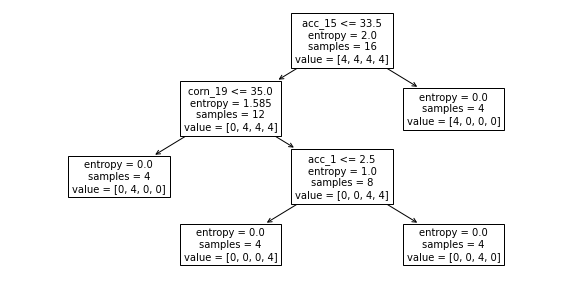

In [61]:
fig, ax = plt.subplots(figsize=(10, 5))
tree.plot_tree(clf_tree, fontsize=10,feature_names = list(X.columns))
plt.savefig("tesialbero.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Indice di Gini ed entropia

In [19]:
def gini(x):
    x_2=1-x
    return 1-x**2-x_2**2

In [72]:
x_axis_gini = [i for i in np.arange(0,1.1,0.1)]
y_axis_gini = []
for x in x_axis_gini:
    y_axis_gini.append(gini(x))

In [91]:
def entropy(x):
    if x!=1:
        x_2=1-x
    return -x*math.log2(x) - x_2*math.log2(x_2)

In [105]:
#x_axis_entr = [i for i in np.arange(0.1,1.0,0.1)]
#x_axis_entr = [i for i in np.arange(0.1, 1, 0.05)]
x_axis_entr = [i for i in np.arange(0.01, 1, 0.01)]
#x_axis_entr = [i for i in np.arange(0.1, 1, 0.01)]
y_axis_entr = []
for x in x_axis_entr:
    y_axis_entr.append(entropy(x))

In [48]:
plt.plot(x_axis_gini,y_axis_gini,linewidth=5,color='red')
plt.xlabel('P(i)')
plt.ylabel('Gini')
plt.title('Indice di Gini')
plt.show()

NameError: name 'x_axis_gini' is not defined

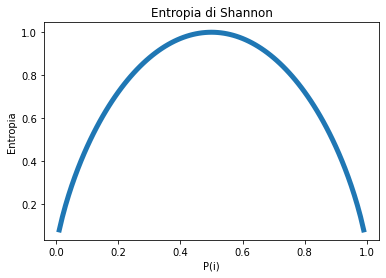

In [131]:
plt.plot(x_axis_entr,y_axis_entr,linewidth=5)
plt.xlabel('P(i)')
plt.ylabel('Entropia')
plt.title('Entropia di Shannon')
plt.show()

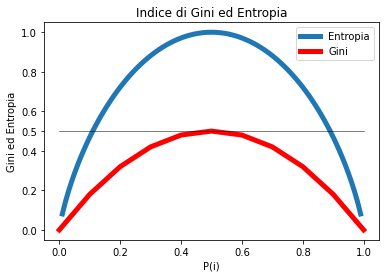

In [133]:
plt.plot(x_axis_entr,y_axis_entr,linewidth=5, label='Entropia')
plt.plot(x_axis_gini,y_axis_gini,linewidth=5,color='red', label='Gini')
linea = []
for elem in range(0,len(x_axis_gini)):
    linea.append(0.5)
plt.plot(x_axis_gini, linea, color = 'black', linewidth=0.5)
plt.yticks([0.0,0.2,0.4,0.5,0.6,0.8,1])
plt.title('Indice di Gini ed Entropia')
plt.xlabel('P(i)')
plt.ylabel('Gini ed Entropia')
plt.legend()
plt.show()

### Grafico su numero di combinazioni possibili (parte bootstrap)

In [62]:
val = []
for num in range(0,30):
    n=num
    val.append(ss.binom(2*n-1,n))

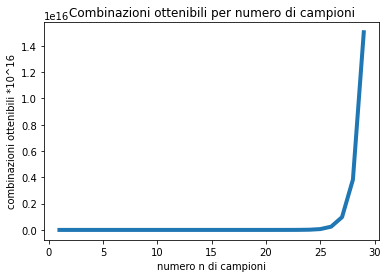

In [64]:
plt.plot([i for i in range(0,30)], val, linewidth = 4)
plt.xlabel('numero n di campioni')
plt.ylabel('combinazioni ottenibili *10^16')
plt.title('Combinazioni ottenibili per numero di campioni')
plt.savefig("combinazioni_campioni.pdf", format="pdf", bbox_inches="tight")
plt.show()